In [1]:
#Q1.Implement a Kalman filter to predict and update the state of an object given its measurements?

In [11]:
import numpy as np

class KalmanFilter:
    def __init__(self, dim_x, dim_z):
        # Initialize state vector and covariance
        self.x = np.zeros((dim_x, 1))  
        self.P = np.eye(dim_x)        
        self.F = np.eye(dim_x)        
        self.H = np.zeros((dim_z, dim_x))  
        self.R = np.eye(dim_z)        
        self.Q = np.eye(dim_x)        

    def predict(self):
        # Predict the next state
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q

    def update(self, z):
        # Update state using measurement
        y = z - np.dot(self.H, self.x)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x += np.dot(K, y)
        self.P = self.P - np.dot(K, np.dot(self.H, self.P))

kf = KalmanFilter(dim_x=4, dim_z=2)
kf.F = np.array([[1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 1]])  # Constant velocity model
kf.H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])  # Position measurements

measurement = np.array([[2.1], [1.3]])  
kf.predict()
kf.update(measurement)
print(kf.x)  


[[1.575]
 [0.525]
 [0.975]
 [0.325]]


In [3]:
#Q2.Write a function to normalize an image array such that pixel values are scaled between 0 and 1?

In [4]:
def normalize_image(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Example Usage
image = np.array([[0, 128, 255], [50, 200, 100]])
normalized_image = normalize_image(image)
print(normalized_image)


[[0.         0.50196078 1.        ]
 [0.19607843 0.78431373 0.39215686]]


In [5]:
#Q3.Create a function to generate dummy object detection data with confidence scores and bounding boxes.
#Filter the detections based on a confidence threshold?

In [6]:
import random

def generate_dummy_detections(num_detections=10):

    detections = []
    for _ in range(num_detections):
        detection = {
            "object_id": random.randint(1, 100),  # Random object ID
            "confidence": round(random.uniform(0.5, 1.0), 2),  # Confidence score (0.5 to 1.0)
            "bounding_box": [  # Random bounding box coordinates (x_min, y_min, x_max, y_max)
                random.randint(0, 500),
                random.randint(0, 500),
                random.randint(500, 1000),
                random.randint(500, 1000)
            ]
        }
        detections.append(detection)
    return detections


def filter_detections_by_confidence(detections, confidence_threshold=0.7):

    return [det for det in detections if det["confidence"] >= confidence_threshold]


# Example usage
num_detections = 15
confidence_threshold = 0.8

# Generate dummy detections
dummy_detections = generate_dummy_detections(num_detections)
print("Generated Detections:")
for detection in dummy_detections:
    print(detection)

# Filter detections
filtered_detections = filter_detections_by_confidence(dummy_detections, confidence_threshold)
print("\nFiltered Detections (Confidence >= 0.8):")
for detection in filtered_detections:
    print(detection)


Generated Detections:
{'object_id': 17, 'confidence': 0.91, 'bounding_box': [446, 11, 872, 524]}
{'object_id': 57, 'confidence': 0.77, 'bounding_box': [402, 105, 798, 932]}
{'object_id': 30, 'confidence': 0.64, 'bounding_box': [114, 24, 624, 501]}
{'object_id': 30, 'confidence': 0.87, 'bounding_box': [206, 185, 844, 556]}
{'object_id': 92, 'confidence': 0.51, 'bounding_box': [297, 299, 804, 896]}
{'object_id': 54, 'confidence': 0.72, 'bounding_box': [23, 156, 898, 908]}
{'object_id': 79, 'confidence': 0.73, 'bounding_box': [443, 353, 660, 526]}
{'object_id': 20, 'confidence': 0.91, 'bounding_box': [281, 405, 888, 600]}
{'object_id': 80, 'confidence': 0.75, 'bounding_box': [493, 8, 749, 576]}
{'object_id': 91, 'confidence': 0.83, 'bounding_box': [494, 56, 635, 663]}
{'object_id': 54, 'confidence': 0.76, 'bounding_box': [20, 92, 885, 924]}
{'object_id': 100, 'confidence': 0.9, 'bounding_box': [352, 278, 586, 596]}
{'object_id': 22, 'confidence': 0.7, 'bounding_box': [73, 349, 797, 795]}


In [7]:
#Q4.Write a function that takes a list of YOLO detections and extracts a random 128-dimensional feature vector
#for each detection?

In [10]:
def extract_features(detections):
    return [{"bbox": det["bbox"], "features": np.random.rand(128)} for det in detections]


detections = [{"bbox": [10, 20, 30, 40]}, {"bbox": [15, 25, 35, 45]}]
features = extract_features(detections)
print(features)


[{'bbox': [10, 20, 30, 40], 'features': array([0.29953161, 0.0399048 , 0.0044977 , 0.85282034, 0.35691642,
       0.84850764, 0.44322488, 0.69827462, 0.18524439, 0.73457445,
       0.49483795, 0.7713213 , 0.44394809, 0.49345807, 0.7585685 ,
       0.73450902, 0.05472137, 0.27849217, 0.7408834 , 0.89313286,
       0.46975427, 0.11847442, 0.82197867, 0.03729615, 0.78583707,
       0.4111334 , 0.60268569, 0.4468033 , 0.0189645 , 0.24990003,
       0.79989332, 0.19483203, 0.85987964, 0.58598594, 0.35596067,
       0.90026325, 0.13037296, 0.29129886, 0.13712382, 0.84811475,
       0.1427735 , 0.27400163, 0.75509532, 0.20250482, 0.27292907,
       0.48250712, 0.21397236, 0.49482146, 0.31731717, 0.3766769 ,
       0.94290435, 0.5445002 , 0.71910963, 0.706825  , 0.09354088,
       0.03867523, 0.53232978, 0.67710256, 0.35526879, 0.83249712,
       0.44478827, 0.37522643, 0.29690031, 0.37569291, 0.59208111,
       0.46438338, 0.74592174, 0.12786363, 0.69863916, 0.8847364 ,
       0.06843903, 0.9

In [9]:
#Q5.Write a function to re-identify objects by matching feature vectors based on Euclidean distance?

In [12]:
def match_features(features1, features2, threshold=0.5):
    matches = []
    for i, f1 in enumerate(features1):
        for j, f2 in enumerate(features2):
            dist = np.linalg.norm(f1['features'] - f2['features'])
            if dist <= threshold:
                matches.append((i, j))
    return matches


features1 = [{"features": np.random.rand(128)} for _ in range(3)]
features2 = [{"features": np.random.rand(128)} for _ in range(3)]
matches = match_features(features1, features2, threshold=5.0)
print(matches)


[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]


In [13]:
#Q6. Write a function to track object positions using YOLO detections and a Kalman Filter?

In [14]:
def track_objects(detections, kalman_filters):
    updated_tracks = []
    for i, det in enumerate(detections):
        measurement = np.array([[det["bbox"][0]], [det["bbox"][1]]])  # Assume x, y positions
        kf = kalman_filters[i]
        kf.predict()
        kf.update(measurement)
        updated_tracks.append(kf.x)
    return updated_tracks


In [15]:
#Q7. Implement a simple Kalman Filter to track an object's position in a 2D space (simulate the object's
#movement with random noise).

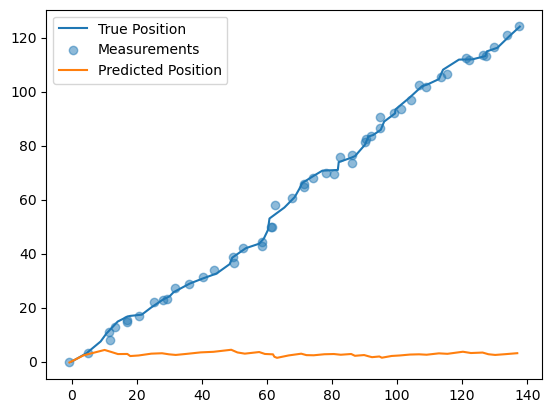

In [16]:
import matplotlib.pyplot as plt


true_positions = [np.array([0, 0])]
for _ in range(50):
    true_positions.append(true_positions[-1] + np.random.rand(2) * 5)

# Add noise to measurements
measurements = [pos + np.random.randn(2) for pos in true_positions]

# Kalman Filter tracking
kf = KalmanFilter(dim_x=4, dim_z=2)
kf.F = np.array([[1, 1, 0, 0], [0, 1, 0, 0], [0, 0, 1, 1], [0, 0, 0, 1]])
kf.H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])
kf.R = np.eye(2) * 0.5  # Measurement noise
kf.Q = np.eye(4) * 0.1  # Process noise

predicted_positions = []
for z in measurements:
    kf.predict()
    kf.update(z.reshape(2, 1))
    predicted_positions.append(kf.x[:2].flatten())

true_positions = np.array(true_positions)
measurements = np.array(measurements)
predicted_positions = np.array(predicted_positions)

plt.plot(true_positions[:, 0], true_positions[:, 1], label="True Position")
plt.scatter(measurements[:, 0], measurements[:, 1], label="Measurements", alpha=0.5)
plt.plot(predicted_positions[:, 0], predicted_positions[:, 1], label="Predicted Position")
plt.legend()
plt.show()
